## 4.1. Работа с датасетом "house price"
### 1.1 Скачать данные по ссылке kc-house-data и laptop_price
### 1.2 Изучите стоимости недвижимости
### 1.3 Изучите распределение квадратуры жилой площади
### 1.4 Изучите распределение года постройки
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

1.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2

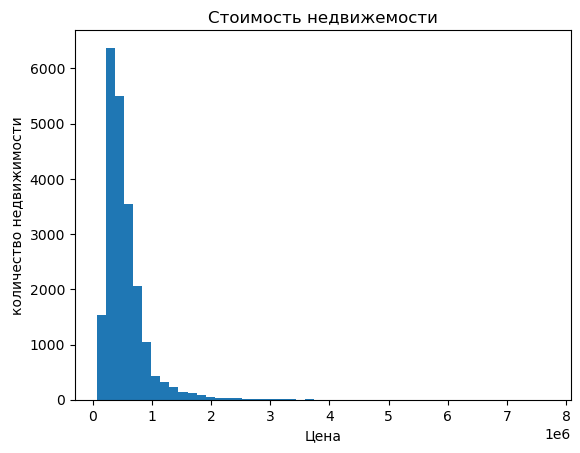

In [6]:
plt.hist(df['price'],bins=50)
plt.title('Стоимость недвижемости')
plt.xlabel('Цена')
plt.ylabel('количество недвижимости');

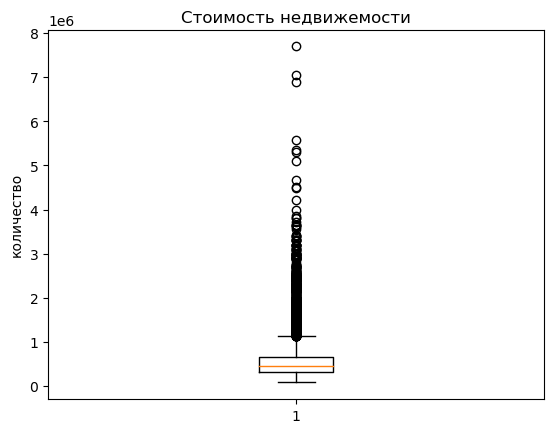

In [7]:
plt.boxplot(df['price'])
plt.title('Стоимость недвижемости')
plt.ylabel('количество');

Почти все жилье стоимостью до 1000000 . Есть более дорогое жилье, до 3000000 сосоредоточено небольшое количество, более 3000000 -4000000 уже единичные варианты

1.3

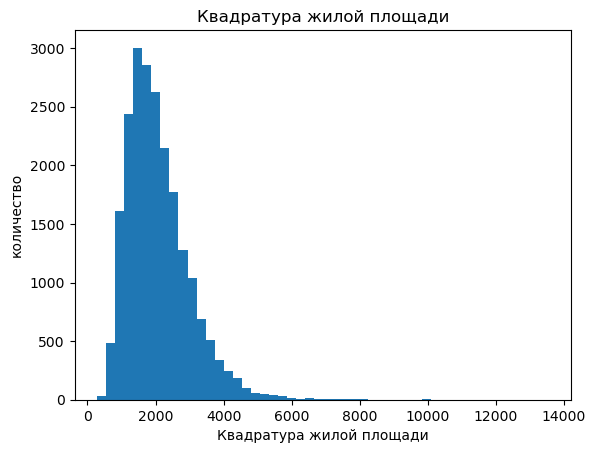

In [10]:
plt.hist(df['sqft_living'],bins=50)
plt.title('Квадратура жилой площади')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('количество');

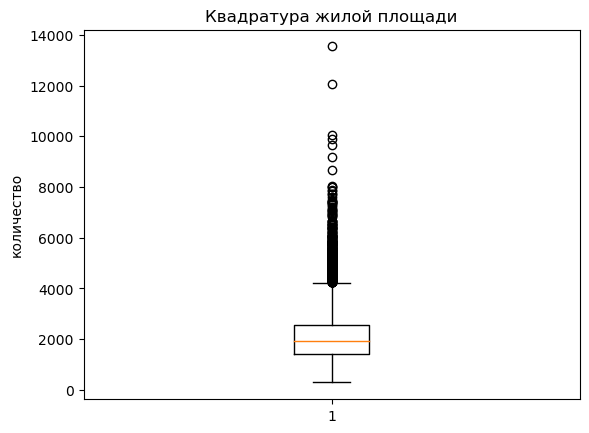

In [11]:
plt.boxplot(df['sqft_living'])
plt.title('Квадратура жилой площади')
plt.ylabel('количество');

Жилая плошадь анализируемой недвижемости в основном сосредоточена в диапазоне до 4000, с модой в районе 2000. Также есть небольшое количество недвижемости с с жилой площадью с 4000 до 6000, и небольшое количество более 6000.

1.4

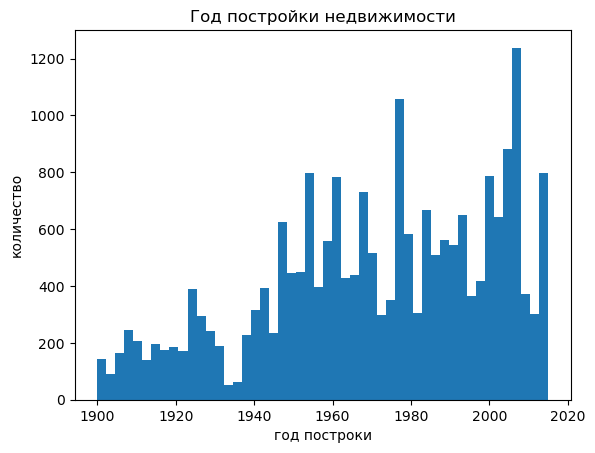

In [13]:
plt.hist(df['yr_built'],bins=50)
plt.title('Год постройки недвижимости')
plt.xlabel('год построки')
plt.ylabel('количество');

Из графика видно, что были периоды снижения строительства, например - 1930-х годах и есть годы с пиковым строительством, например 2010.

## 4.2. Работа с датасетом "house price"
### 2.1 Изучите распределение домов от наличия вида на набережную
### 2.2 Изучите распределение этажей домов
### 2.3 Изучите распределение состояния домов
- Постройте график
- Сделайте выводы

2.1

In [15]:
waterfront = df['waterfront'].value_counts()
waterfront

0    21450
1      163
Name: waterfront, dtype: int64

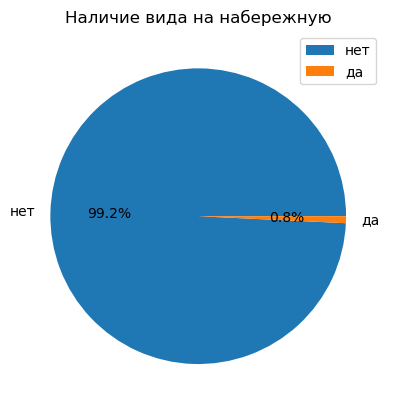

In [20]:
plt.pie(waterfront.values,labels=['нет','да'],autopct="%.1f%%")
plt.title('Наличие вида на набережную')
plt.legend(['нет','да']);


Более 99 процентов домов не имеют вид на набережную

2.2

In [ ]:
floors = df['floors'].value_counts()
floors

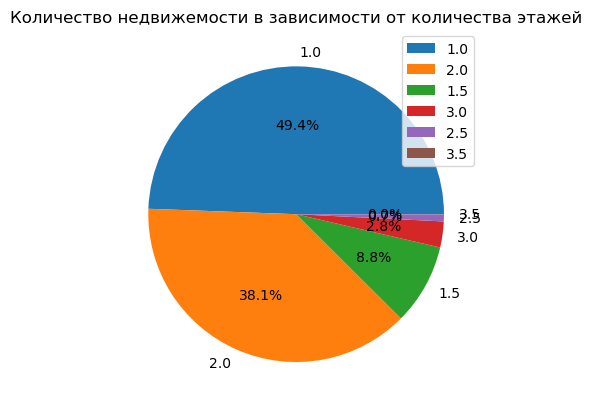

In [38]:
plt.pie(floors.values,labels=floors.index,autopct="%.1f%%")
plt.title('Количество недвижемости в зависимости от количества этажей')
plt.legend(floors.index);


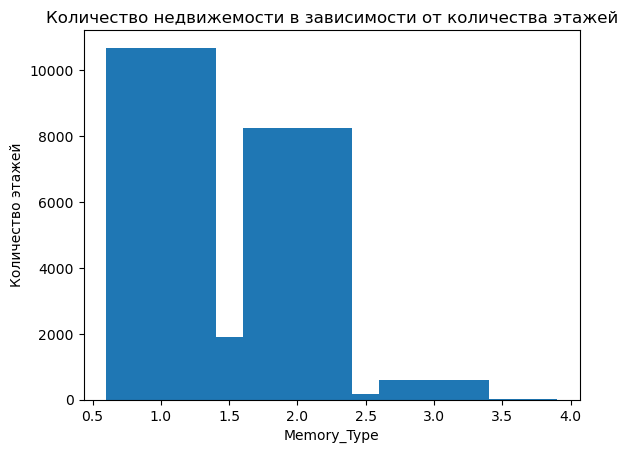

In [30]:
plt.bar(floors.index,floors.values)
plt.title('Количество недвижемости в зависимости от количества этажей')
plt.xlabel('Memory_Type')
plt.ylabel('Количество этажей');


Самое большое количество недвижемости с 1 (почти 50%) и 2 (38%) этажами.

2.3

In [31]:
condition = df['condition'].value_counts()
condition

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

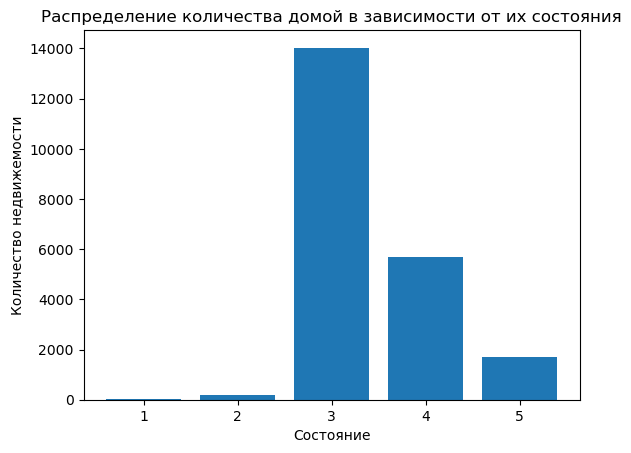

In [34]:
plt.bar(condition.index,condition.values)
plt.title('Распределение количества домой в зависимости от их состояния')
plt.xlabel('Состояние')
plt.ylabel('Количество недвижемости');

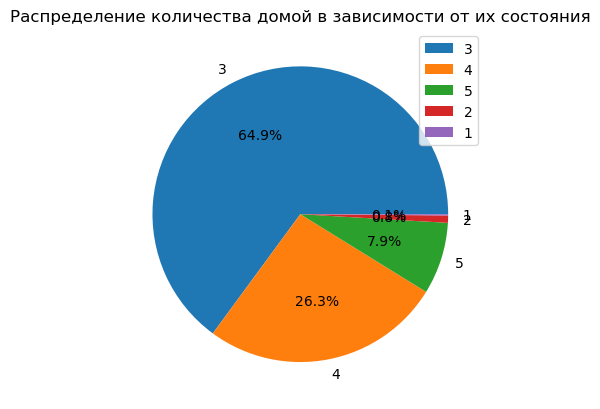

In [39]:
plt.pie(condition.values,labels=condition.index,autopct="%.1f%%")
plt.title('Распределение количества домой в зависимости от их состояния')
plt.legend(condition.index);

Почти 65% всех домой в среднем состоянии (3), еще 26% в состоянии выше среднего (4) т 8% в отличном состоянии (5), и совсем небольшое кол-во домой в плохом состоянии и состоянии ниже среднего.

## 4.3 Работа с датасетом "house price"
### 4.1 Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [44]:
correl = df.corr(numeric_only=True)
correl = np.round(correl, 1)
correl[np.abs(correl) < 0.2] = 0

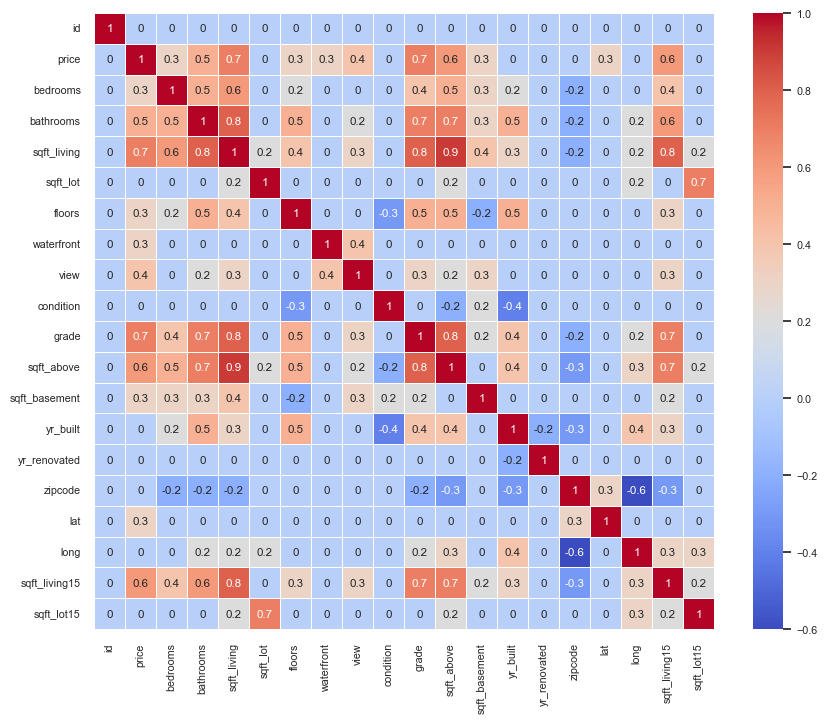

In [46]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.7)
sns.heatmap(correl, annot=True, linewidths=.5, cmap='coolwarm');

Построив матрицу корреляций можно увидеть, что на стоимость недвижемости самое большое влияние имеют слеующие параметры:
* квадратура жилой площади (коэф корреляции 0.7)
* грейд дома (коэф корреляции 0.7)
* Кв. метры дома, которые находятся выше земли (коэф корреляции 0.6)
* Кв. метры жилой площади у 15 соседей (коэф корреляции 0.6)
* Кол-во ванных комнат (коэф корреляции 0.5)

Рассмотрим влияние этих параметров более детально.

<Figure size 800x800 with 0 Axes>

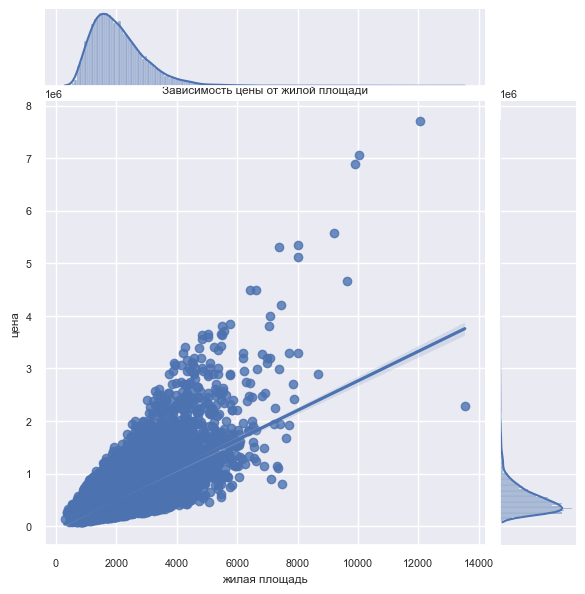

In [50]:
plt.figure(figsize=(8, 8))
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');
plt.xlabel('жилая площадь')
plt.ylabel('цена')
plt.title('Зависимость цены от жилой площади');

Видна явная зависимость стоимости дома в зависимости от кол-ва жилой площади, с увеличением жилой площади, ценовой диапазон растет.

In [54]:
grades = df['grade'].value_counts()
grades

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

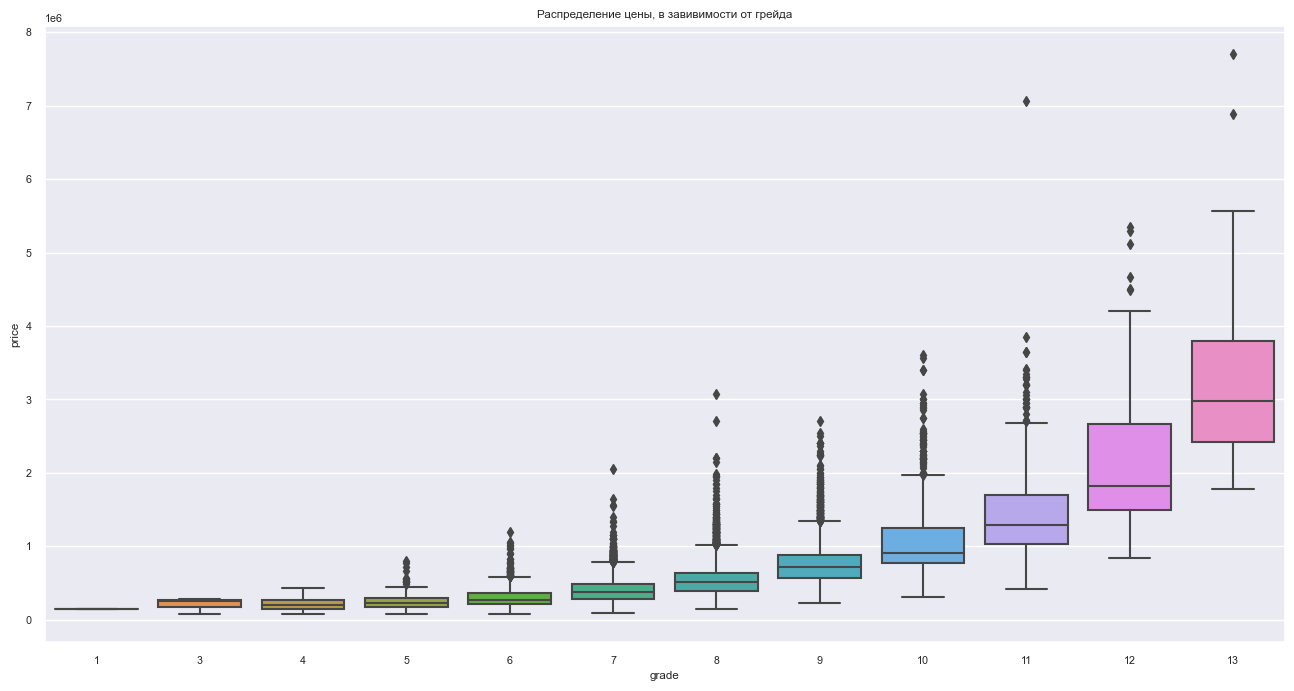

In [56]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['grade'], y=df['price'], whis=1.5)

plt.xlabel('grade')
plt.ylabel('price')
plt.title('Распределение цены, в завивимости от грейда');

Из графика видна явная завивимость цены дома от грейда, с увеличением грейда растет цена.

<Figure size 800x800 with 0 Axes>

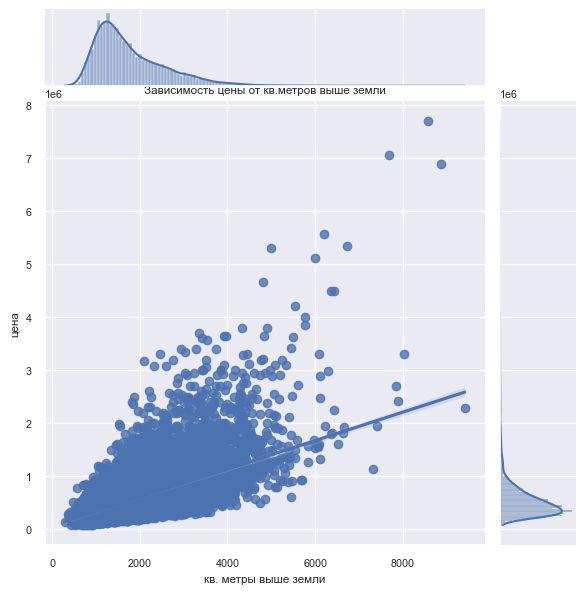

In [57]:
plt.figure(figsize=(8, 8))
sns.jointplot(x=df['sqft_above'], y=df['price'], kind='reg');
plt.xlabel('кв. метры выше земли')
plt.ylabel('цена')
plt.title('Зависимость цены от кв.метров выше земли');

Видна явная зависимость стоимости дома в зависимости от кол-ва площади над землей, с увеличением жилой площади над землей, ценовой диапазон растет.

<Figure size 800x800 with 0 Axes>

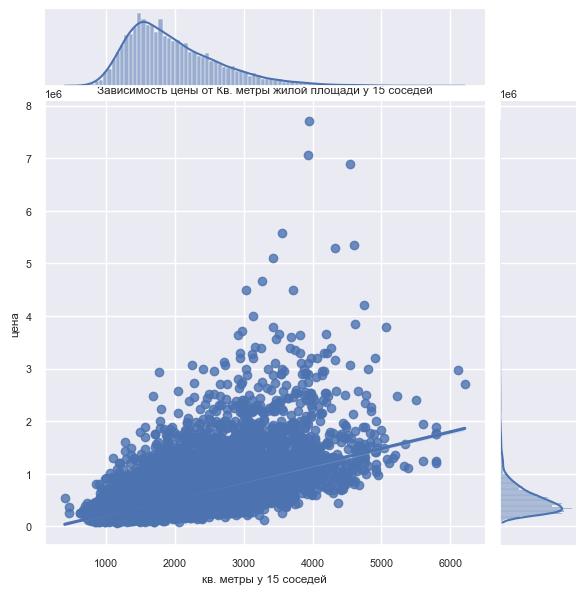

In [59]:
plt.figure(figsize=(8, 8))
sns.jointplot(x=df['sqft_living15'], y=df['price'], kind='reg');
plt.xlabel('кв. метры у 15 соседей')
plt.ylabel('цена')
plt.title('Зависимость цены от Кв. метры жилой площади у 15 соседей');

Из графика виден общий тренд на увеличение цены при увеличении кв метров у 15 соседей.

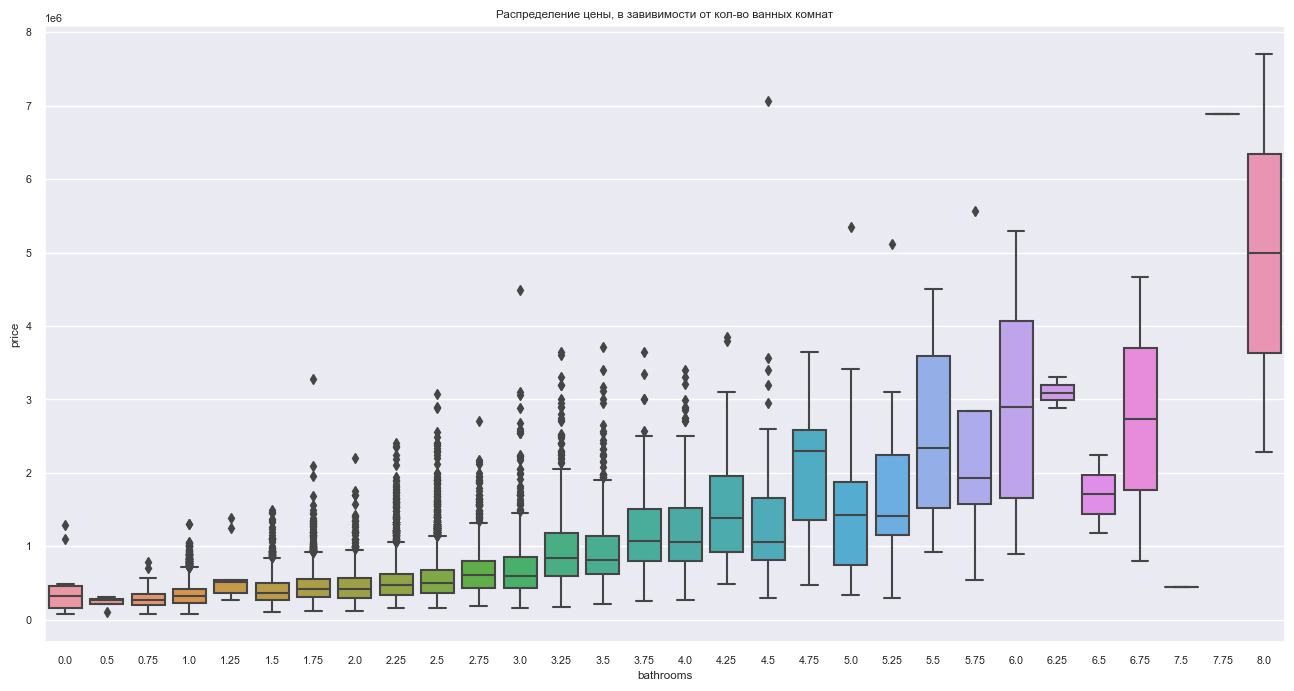

In [60]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['bathrooms'], y=df['price'], whis=1.5)

plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Распределение цены, в завивимости от кол-во ванных комнат');

Проанализировав график, можно увидеть тренд на увеличение стоимости недвижемости в зависимости от кол-ва ванных комнат. видны небольшие волнения в графике, как например снижение срдней и квантилей при 5 и 5,25 по сравнению с 4,75. но это не влияет на общий тренд.